# 微积分
:label:`sec_calculus`

在2500年前，古希腊人把一个多边形分成三角形，并把它们的面积相加，才找到计算多边形面积的方法。
为了求出曲线形状（比如圆）的面积，古希腊人在这样的形状上刻内接多边形。
如 :numref:`fig_circle_area`所示，内接多边形的等长边越多，就越接近圆。
这个过程也被称为*逼近法*（method of exhaustion）。

![用逼近法求圆的面积](../img/polygon-circle.svg)
:label:`fig_circle_area`

事实上，逼近法就是*积分*（integral calculus）的起源。
2000多年后，微积分的另一支，*微分*（differential calculus）被发明出来。
在微分学最重要的应用是优化问题，即考虑如何把事情做到最好。
正如在 :numref:`subsec_norms_and_objectives`中讨论的那样，
这种问题在深度学习中是无处不在的。

在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。
通常情况下，变得更好意味着最小化一个*损失函数*（loss function），
即一个衡量“模型有多糟糕”这个问题的分数。
最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。
但“训练”模型只能将模型与我们实际能看到的数据相拟合。
因此，我们可以将拟合模型的任务分解为两个关键问题：

* *优化*（optimization）：用模型拟合观测数据的过程；
* *泛化*（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

为了帮助读者在后面的章节中更好地理解优化问题和方法，
本节提供了一个非常简短的入门教程，帮助读者快速掌握深度学习中常用的微分知识。

## 导数和微分

我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。
在深度学习中，我们通常选择对于模型参数可微的损失函数。
简而言之，对于每个参数，
如果我们把这个参数*增加*或*减少*一个无穷小的量，可以知道损失会以多快的速度增加或减少，

假设我们有一个函数$f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。
(**如果$f$的*导数*存在，这个极限被定义为**)

(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**)
:eqlabel:`eq_derivative`

如果$f'(a)$存在，则称$f$在$a$处是*可微*（differentiable）的。
如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。
我们可以将 :eqref:`eq_derivative`中的导数$f'(x)$解释为$f(x)$相对于$x$的*瞬时*（instantaneous）变化率。
所谓的瞬时变化率是基于$x$中的变化$h$，且$h$接近$0$。

为了更好地解释导数，让我们做一个实验。
(**定义$u=f(x)=3x^2-4x$**)如下：


In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

[**通过令$x=1$并让$h$接近$0$，**] :eqref:`eq_derivative`中(**$\frac{f(x+h)-f(x)}{h}$的数值结果接近$2$**)。
虽然这个实验不是一个数学证明，但稍后会看到，当$x=1$时，导数$u'$是$2$。


In [2]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


让我们熟悉一下导数的几个等价符号。
给定$y=f(x)$，其中$x$和$y$分别是函数$f$的自变量和因变量。以下表达式是等价的：

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

其中符号$\frac{d}{dx}$和$D$是*微分运算符*，表示*微分*操作。
我们可以使用以下规则来对常见函数求微分：

* $DC = 0$（$C$是一个常数）
* $Dx^n = nx^{n-1}$（*幂律*（power rule），$n$是任意实数）
* $De^x = e^x$
* $D\ln(x) = 1/x$

为了微分一个由一些常见函数组成的函数，下面的一些法则方便使用。
假设函数$f$和$g$都是可微的，$C$是一个常数，则：

*常数相乘法则*
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

*加法法则*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

*乘法法则*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

*除法法则*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

现在我们可以应用上述几个法则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。
令$x=1$，我们有$u'=2$：在这个实验中，数值结果接近$2$，
这一点得到了在本节前面的实验的支持。
当$x=1$时，此导数也是曲线$u=f(x)$切线的斜率。

[**为了对导数的这种解释进行可视化，我们将使用`matplotlib`**]，
这是一个Python中流行的绘图库。
要配置`matplotlib`生成图形的属性，我们需要(**定义几个函数**)。
在下面，`use_svg_display`函数指定`matplotlib`软件包输出svg图表以获得更清晰的图像。

注意，注释`#@save`是一个特殊的标记，会将对应的函数、类或语句保存在`d2l`包中。
因此，以后无须重新定义就可以直接调用它们（例如，`d2l.use_svg_display()`）。


In [14]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

我们定义`set_figsize`函数来设置图表大小。
注意，这里可以直接使用`d2l.plt`，因为导入语句
`from matplotlib import pyplot as plt`已标记为保存到`d2l`包中。


In [15]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
#`d2l.plt.rcParams` 访问 Matplotlib 的配置字典。 
#- `'figure.figsize'` 是配置字典中的一个键，用于控制图形的默认大小。
#- `figsize` 是一个变量，它应该包含一个元组（tuple），用于指定图形的宽度和高度，通常以英寸为单位。

下面的`set_axes`函数用于设置由`matplotlib`生成图表的轴的属性。


In [16]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)#x 轴的缩放类型，可以是 `'linear'`（线性），`'log'`（对数）等
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)#定义 x 轴的显示范围，例如 `(xmin, xmax)`
    axes.set_ylim(ylim)
    if legend:#一个列表，包含图例中的标签，如果不需要图例，则为 `None`
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，定义一个`plot`函数来简洁地绘制多条曲线，
因为我们需要在整个书中可视化许多曲线。


In [17]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
#获取当前的绘图区域（`Axes` 对象）
    # 如果X有一个轴，输出True
    
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))
# `hasattr(X, "ndim") and X.ndim == 1`: 这部分检查 `X` 是否有 `ndim` 属性，并且该属性的值是否为 1。
#`ndim` 属性通常在 NumPy 数组（`numpy.ndarray`）中存在，表示数组的维数。
#如果 `X` 是一个一维 NumPy 数组，这个条件会返回 `True`。
#`isinstance(X, list) and not hasattr(X[0], "__len__")`: 这部分检查 `X` 是否是一个列表，并且列表中的第一个元素是否没有 `__len__` 属性。
# 如果 `X` 是一个列表，并且列表中的元素不是另一个可迭代对象（例如，不是列表、元组或字符串），那么这个条件会返回 `True`。
# 这是因为非可迭代对象（如整数或浮点数）没有 `__len__` 方法，而可迭代对象（如列表中的列表）会有 `__len__` 方法。
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

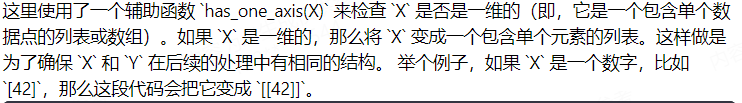
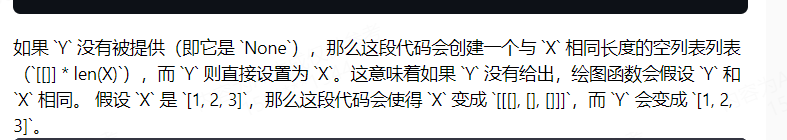
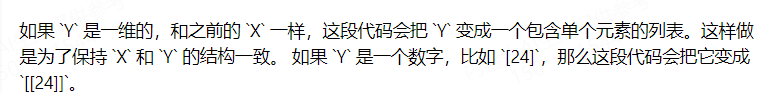
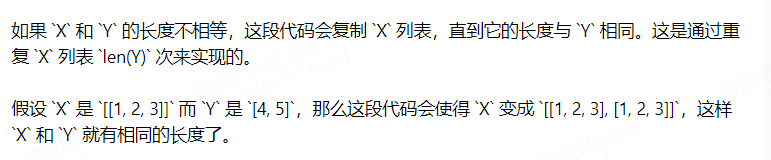
1. 如果 `X` 是一个一维 NumPy 数组，返回 `True`。
2. 如果 `X` 是一个列表，并且列表中的元素都不是可迭代的（例如，都是整数或浮点数），返回 `True`。
3. 其他情况，返回 `False
   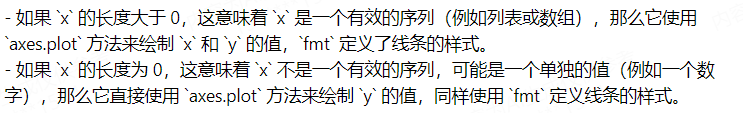`。

现在我们可以[**绘制函数$u=f(x)$及其在$x=1$处的切线$y=2x-3$**]，
其中系数$2$是切线的斜率。


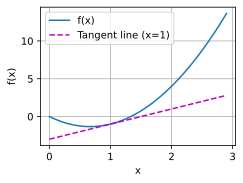

In [18]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):

## 偏导数

到目前为止，我们只讨论了仅含一个变量的函数的微分。
在深度学习中，函数通常依赖于许多变量。
因此，我们需要将微分的思想推广到*多元函数*（multivariate function）上。

设$y = f(x_1, x_2, \ldots, x_n)$是一个具有$n$个变量的函数。
$y$关于第$i$个参数$x_i$的*偏导数*（partial derivative）为：

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算$\frac{\partial y}{\partial x_i}$，
我们可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数，
并计算$y$关于$x_i$的导数。
对于偏导数的表示，以下是等价的：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

## 梯度
:label:`subsec_calculus-grad`

我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的*梯度*（gradient）向量。
具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是
一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。

假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

* 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同样，对于任何矩阵$\mathbf{X}$，都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。
正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

## 链式法则

然而，上面方法可能很难找到梯度。
这是因为在深度学习中，多元函数通常是*复合*（composite）的，
所以难以应用上述任何规则来微分这些函数。
幸运的是，链式法则可以被用来微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

现在考虑一个更一般的场景，即函数具有任意数量的变量的情况。
假设可微分函数$y$有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \ldots, x_n$。
注意，$y$是$x_1, x_2， \ldots, x_n$的函数。
对于任意$i = 1, 2, \ldots, n$，链式法则给出：

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$

## 小结

* 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。
* 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。
* 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。
* 链式法则可以用来微分复合函数。

## 练习

1. 绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。
1. 求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。
1. 函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什么？
1. 尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则。
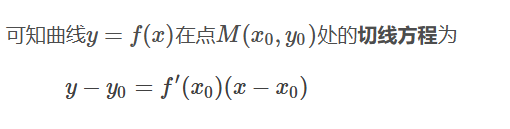

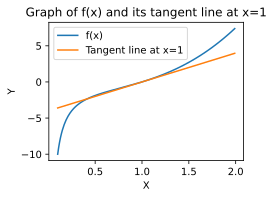

In [20]:
from matplotlib import pyplot as plt
# 定义函数
def f(x):
    return x**3 - 1/x

# 定义x=point的切线
def f_tangent(f, x, point):
    h = 1e-4
    grad = (f(point+h) - f(point)) / h
    return grad*(x-point) + f(point)

# 绘制函数图像和切线
x = np.arange(0.1, 2.0, 0.01)
y = f(x)
y_tangent = f_tangent(f, x=x, point=1)
plt.plot(x,y, label='f(x)')
plt.plot(x,y_tangent, label='Tangent line at x=1')
plt.legend()
plt.title('Graph of f(x) and its tangent line at x=1')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [22]:
import torch
x = torch.arange(2.0, requires_grad=True)
y = 3*x[0]**2+ 5*torch.exp(x[1])
y.backward()#执行了反向传播，计算了 `y` 关于 `x` 的梯度

print("f(x)的梯度：", x.grad)
print("验证梯度：", x.grad==torch.tensor([6*x[0], 5*torch.exp(x[1])]))


f(x)的梯度： tensor([ 0.0000, 13.5914])
验证梯度： tensor([True, True])


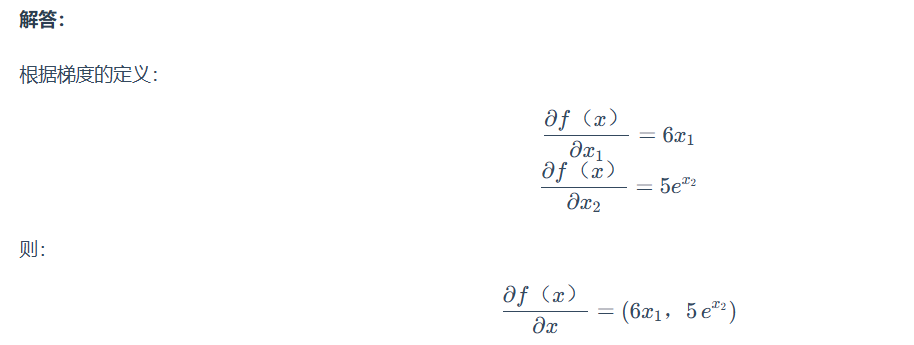
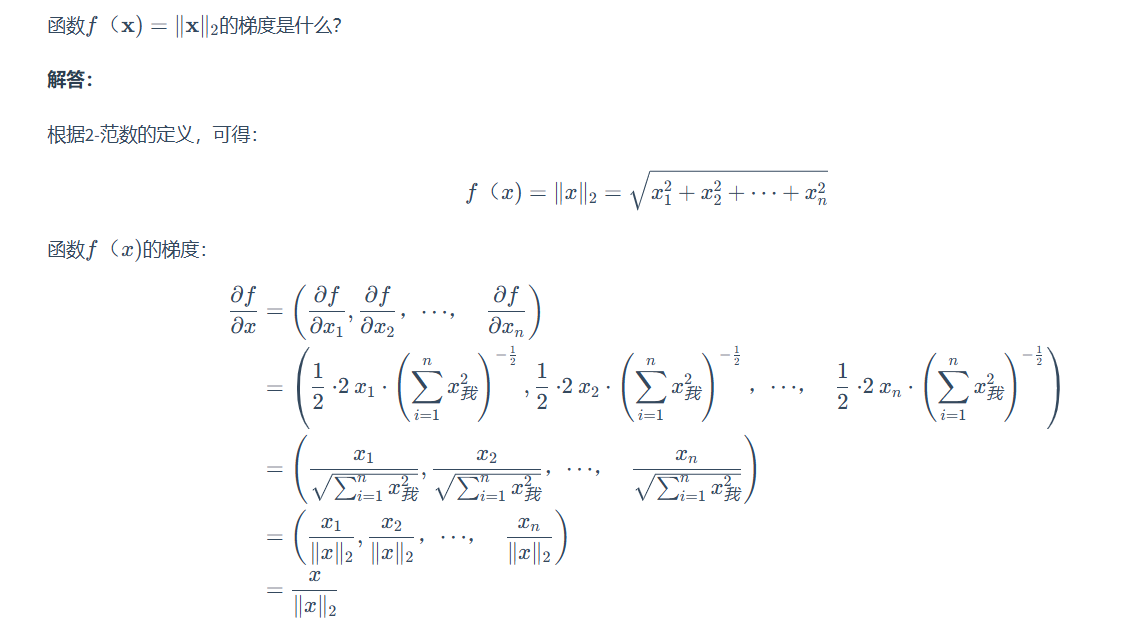

In [24]:
x = torch.arange(4.0,requires_grad=True)
y = torch.dot(x, x).sqrt()
y.backward()
print("f(x)的梯度：", x.grad)
print("验证结果：", x.grad==x/(torch.dot(x, x).sqrt()))


f(x)的梯度： tensor([0.0000, 0.2673, 0.5345, 0.8018])
验证结果： tensor([True, True, True, True])


[Discussions](https://discuss.d2l.ai/t/1756)


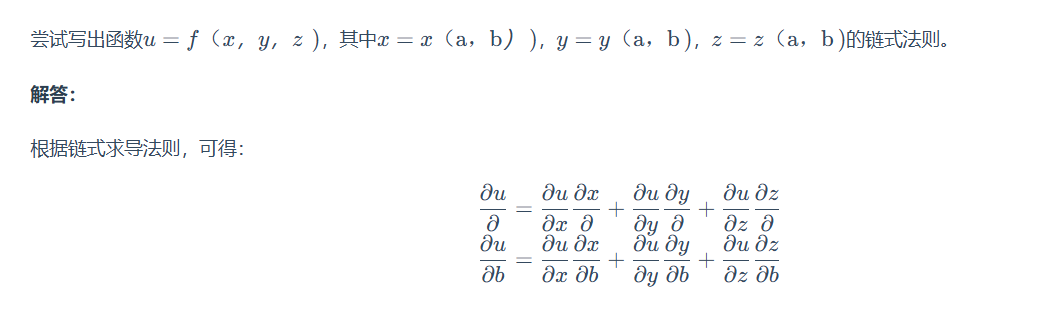